<a href="https://colab.research.google.com/github/ara42/Machine-Learning/blob/main/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
iris = load_iris()
data = iris.data
label = iris.target

In [5]:
from sklearn.mixture import GaussianMixture

In [7]:
model = KMeans(n_clusters=3)
model.fit(data)
pred = model.labels_
df = pd.DataFrame(data,columns=iris.feature_names)
df['label'] = label
df['kmeans'] = pred
df.groupby(['label'])['kmeans'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


label  kmeans
0      2         50
1      1         48
       0          2
2      0         36
       1         14
Name: kmeans, dtype: int64

label  gmm
0      0      50
1      2      45
       1       5
2      1      50
Name: gmm, dtype: int64


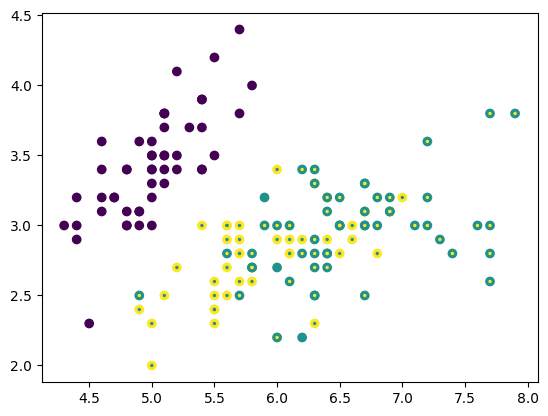

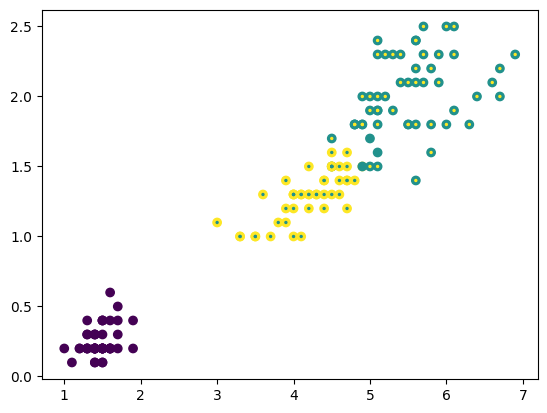

In [10]:
model = GaussianMixture(n_components=3)
model.fit(data)
pred = model.predict(data)
df = pd.DataFrame(data,columns=iris.feature_names)
df['label'] = label
df['gmm'] = pred
print(df.groupby(['label'])['gmm'].value_counts())
plt.scatter(data[:,0],data[:,1],c=pred)
plt.scatter(data[:,0],data[:,1],c=label,s=2)
plt.show()
plt.scatter(data[:,2],data[:,3],c=pred)
plt.scatter(data[:,2],data[:,3],c=label,s=2)
plt.show()

In [11]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,gmm
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561,0.453272
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658,-0.602439
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035,0.640435
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547,0.572764
label,0.782561,-0.426658,0.949035,0.956547,1.000000,0.513440
gmm,0.453272,-0.602439,0.640435,0.572764,0.513440,1.000000


In [12]:
from sklearn.datasets import make_blobs

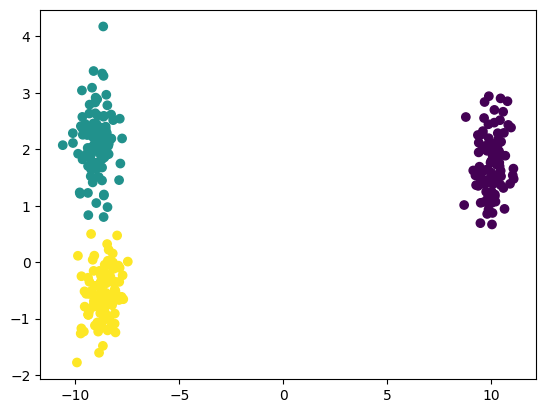

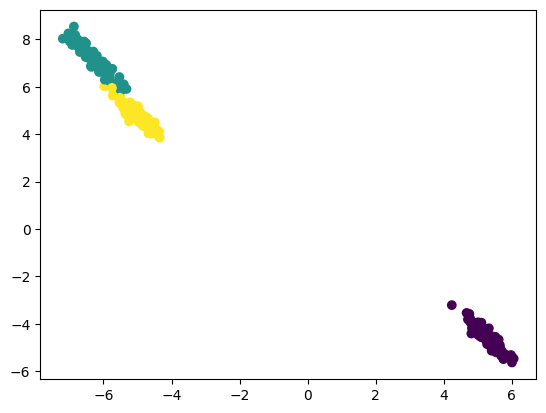

In [26]:
x,y = make_blobs(n_samples=300,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5) #값이 커지며 충돌이 생김
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()
trans = [[0.6,-0.6],[-0.4,0.8]]
x_an = np.dot(x,trans)
plt.scatter(x_an[:,0],x_an[:,1],c=y)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


label  kmeans
0      1         100
1      0          97
       2           3
2      2          98
       0           2
Name: kmeans, dtype: int64


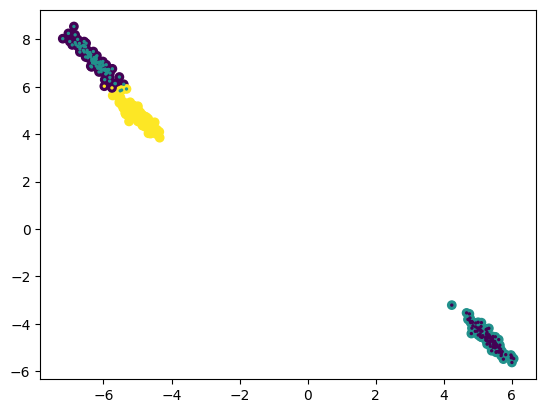

In [27]:
model = KMeans(n_clusters=3)
model.fit(x_an)
pred = model.labels_
df = pd.DataFrame(x_an)
df['label'] = y
df['kmeans'] = pred
print(df.groupby(['label'])['kmeans'].value_counts())
plt.scatter(x_an[:,0],x_an[:,1],c=pred)
plt.scatter(x_an[:,0],x_an[:,1],c=y,s=2)
plt.show()

label  gmm
0      1      100
1      2      100
2      0       99
       2        1
Name: gmm, dtype: int64


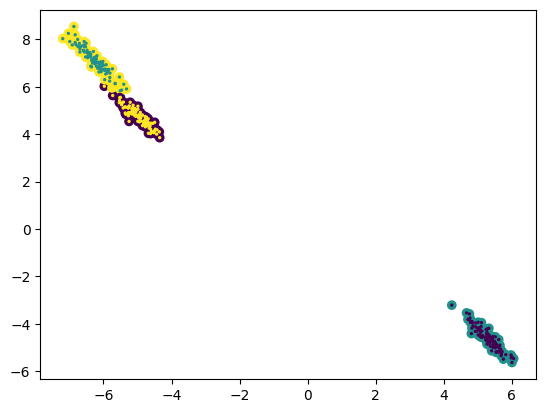

In [28]:
model = GaussianMixture(n_components=3)
model.fit(x_an)
pred = model.predict(x_an)
df = pd.DataFrame(x_an)
df['label'] = y
df['gmm'] = pred
print(df.groupby(['label'])['gmm'].value_counts())
plt.scatter(x_an[:,0],x_an[:,1],c=pred)
plt.scatter(x_an[:,0],x_an[:,1],c=y,s=2)
plt.show()